# Solving Classification Problems

In [34]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "3_Classification"
MODELN_DATA_PATH = ".\\datasets\\modeln" 
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Predicting Which Medicaid Claims to Dispute

## Load and Inspect Data

In [35]:
import pandas as pd   # Check out pandas documentation for additional details of this powerful library

def load_data(data_path, filename):
    
    # If you are creating or editing CSV files in Excel, make sure you save it as UTF-8 encoded 
    # otherwise Pandas will fail to load

    csv_path = os.path.join(data_path, filename)    
    print(csv_path)
    return pd.read_csv(csv_path)

In [36]:
claims_data = load_data(MODELN_DATA_PATH, "medicaid_claims.csv")

# check to see if data is what you were expecting 
claims_data.head()



.\datasets\modeln\medicaid_claims.csv


,Claim Original Invoice Date,Claim Original Receipt Date,Claim Revision Number,Claim State,Claim Type,Claim Line Average Manufacturer Price,Claim Line Average Selling Price,Claim Line Best Price,Claim Line Calculated URA,Claim Line Previous URA,Claim Line URA Invoiced,Claim Line WAC Price (end of quarter),Claim Line WAC Price (start of quarter),Program Default Analyst,Program Name,Program State Adjustments Rule,Program Type,Disputed
0,1/1/2018,1/31/2018,1,California - CA,New,239,222.27,200.0430,38.9570,35.061300,35.84044,358.50,362.0850,Mr. Ramesh S,County Workers Diabetes Reduction,Incremental,Medicaid,False
1,1/1/2018,1/31/2018,5,California - CA,Adjustment,210,201.60,183.4560,26.5440,27.340320,24.68592,294.00,299.8800,Mr. Ramesh S,County Workers Diabetes Reduction,Incremental,Medicaid,False
2,1/2/2018,2/1/2018,2,California - CA,Adjustment,202,181.80,165.4380,36.5620,35.465140,36.19638,268.66,274.0332,Mr. Ramesh S,County Workers Diabetes Reduction,Incremental,Medicaid,False
3,1/3/2018,2/2/2018,3,California - CA,New,225,209.25,205.0650,19.9350,20.931750,22.32720,274.50,296.4600,Mr. Bill K,County Workers Diabetes Reduction,Incremental,Medicaid,False
4,1/3/2018,2/2/2018,4,California - CA,New,201,196.98,185.1612,15.8388,15.680412,18.21462,291.45,311.8515,Ms. Sally J,County Workers Diabetes Reduction,Incremental,Medicaid,False


In [37]:
# Obtaining information about the data
# Compare the non-null counts to see if there are null entries

claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Claim Original Invoice Date              1814 non-null   object 
 1   Claim Original Receipt Date              1814 non-null   object 
 2   Claim Revision Number                    1814 non-null   int64  
 3   Claim State                              1814 non-null   object 
 4   Claim Type                               1814 non-null   object 
 5   Claim Line Average Manufacturer Price    1814 non-null   int64  
 6   Claim Line Average Selling Price         1814 non-null   float64
 7   Claim Line Best Price                    1814 non-null   float64
 8   Claim Line Calculated URA                1814 non-null   float64
 9   Claim Line Previous URA                  1814 non-null   float64
 10  Claim Line URA Invoiced                  1814 no

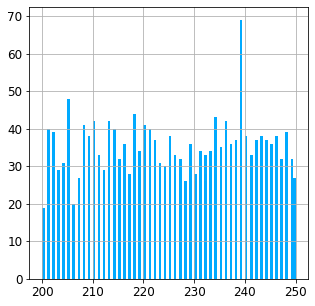

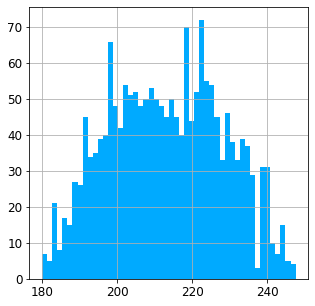

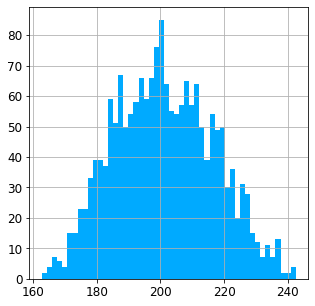

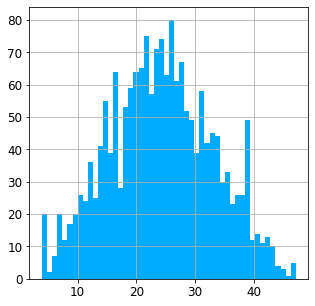

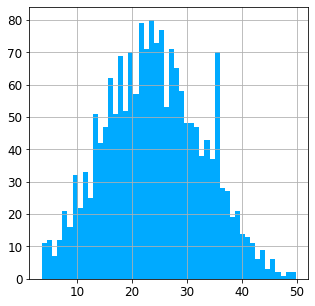

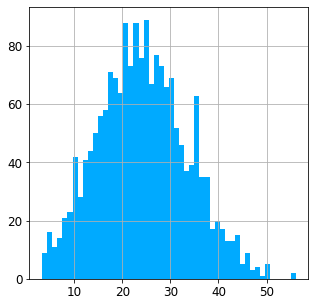

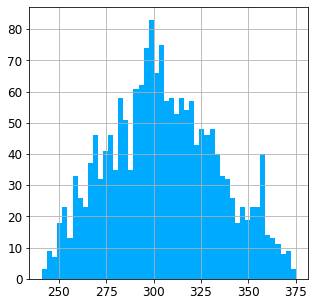

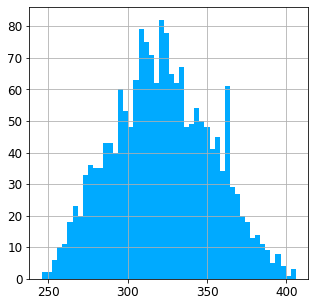

In [38]:

claims_data["Claim Line Average Manufacturer Price"].hist(bins=100, figsize=(5,5), color="#00aaff")
plt.show()

claims_data["Claim Line Average Selling Price"].hist(bins=50, figsize=(5,5), color="#00aaff")
plt.show()

claims_data["Claim Line Best Price"].hist(bins=50, figsize=(5,5), color="#00aaff")
plt.show()

claims_data["Claim Line Calculated URA"].hist(bins=50, figsize=(5,5), color="#00aaff")
plt.show()

claims_data["Claim Line Previous URA"].hist(bins=50, figsize=(5,5), color="#00aaff")
plt.show()

claims_data["Claim Line URA Invoiced"].hist(bins=50, figsize=(5,5), color="#00aaff")
plt.show()

claims_data["Claim Line WAC Price (end of quarter)"].hist(bins=50, figsize=(5,5), color="#00aaff")
plt.show()

claims_data["Claim Line WAC Price (start of quarter)"].hist(bins=50, figsize=(5,5), color="#00aaff")
plt.show()



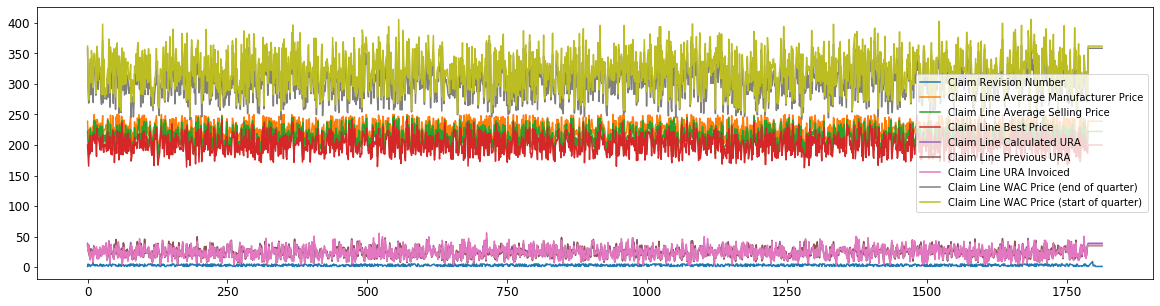

In [39]:
# Plot the data

%matplotlib inline
import matplotlib.pyplot as plt


claims_data.plot(figsize = [20, 5])

## Data Cleaning

In [40]:

# Skipping this process since it was covered in Part II

#claims_data["Disputed"] = claims_data["Disputed"].astype(int)
#claims_data.info()


## Standardize the Data

In [41]:
# We are skipping this step. See Part II for how MinMaxScaler is used. Other standardization techniques may be used as well.

## Plot the cleaned, imputed, scaled data (skipping)

In [42]:
# Skipping here. See Part II for how this is done.

## Split Data into Training and Validation

In [16]:
from sklearn.model_selection import train_test_split

# Scikit does not take Dataframes as inputs, so need to convert DataFrame back into 2D array of data

claims_array = claims_data.to_numpy()

# sticking to ML convention and using X for inputs/features and (lowercase) y for outputs
# Part II used different names

X = claims_array[:, 5:12]   # Selecting only some fields here. If entire table has to be used, convert columns to Ints/Floats, etc.
y = claims_array[:, 17]

# Need to convert the array to bool, otherwise, hell breaks loose in the fit/predict code
y = y.astype(bool)
 

#print(type(y), type(y[0]))
#print("Input features = ", X)
#print ("Output features = ", y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train = y_train.ravel()
y_test = y_test.ravel()

 
#print("Training features = ", X_train)
#print("Testing features = ", X_test)
#print("Training outputs = ", y_train)
#print("Testing outputs = ", y_test)



# Classify Using Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

# solver can also be sag, saga, newton-cg, liblinear. DO NOT GUESS. Read doc and understand first.
reg_log = LogisticRegression(solver="lbfgs") 
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
reg_log.score(X_train, y_train)
 

0.957960027567195

### Review Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix

# Please read my article on accuracy at this location: https://www.linkedin.com/pulse/primer-classification-metrics-pat-bhatt

confusion_matrix(y_test, y_pred)

array([[325,   1],
       [ 10,  27]], dtype=int64)

### Precision

In [31]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred)

0.9642857142857143

### Recall

In [20]:
recall_score(y_test, y_pred)

0.7567567567567568

### F1 Score

In [34]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8253968253968255

### Cross Validation Metrics

In [76]:
from sklearn.model_selection import cross_val_predict
 
# You can skip the previous reg_log.predict and use this instead. This offers a few more options for cross validating results.
y_scores = cross_val_predict(reg_log, X_train, y_train, cv=3,
                             method="decision_function")

print(y_scores)

[-16.15543217  -0.57448174  -5.93228077 ...  -5.92358177  -1.83564076
  -1.08788123]


In [77]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

#print(precisions, recalls, thresholds)

Saving figure precision_recall_vs_threshold_plot


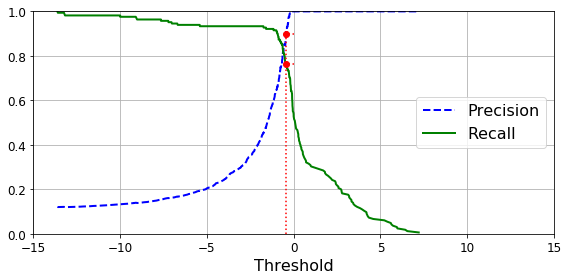

In [78]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-15, 15, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([0, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([0, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

Saving figure precision_vs_recall_plot


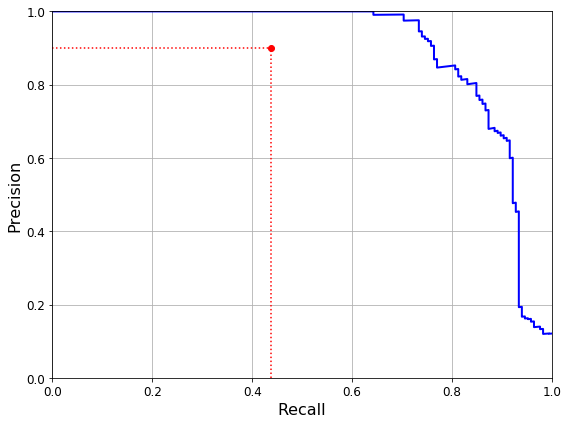

In [79]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

# Receiver Operating Characteristics (ROC) Curves

In [80]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

Saving figure roc_curve_plot


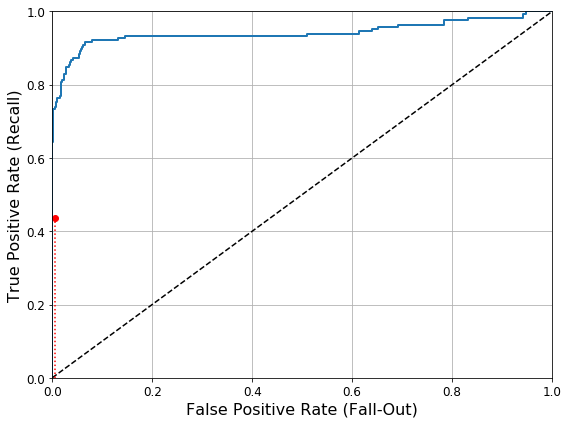

In [81]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
save_fig("roc_curve_plot")                         # Not shown
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9417894358605822

# Experiment with Other Classifiers - Random Forests, SGD, Gaussian Naive Bayes

## Random Forest Classifer

In [288]:
#from sklearn.ensemble import RandomForestClassifier

#rf = RandomForestClassifier()
#rf.fit(X_train, y_train)
#y_pred = rf.predict(X_test)
 

## Stochastic Gradient Descent Classifer

In [290]:
#from sklearn.linear_model import SGDClassifier
 
#sgd = SGDClassifier(max_iter=1000, tol=1e-3)
 
#sgd.fit(X_train, y_train)
#y_pred = sgd.predict(X_test)



## Gaussian Naive Bayes Classifer

In [291]:
# Uncomment code below to use GNB classifier
# Make sure to copy metrics and ROC code from above

#from sklearn.naive_bayes import GaussianNB

#gnb = GaussianNB()

#gnb.fit(X_train, y_train)
#y_pred = gnb.predict(X_test)

# General Examples (not using Model N data any longer)

## Classify Handwritten Digits

### Download MNIST Handwriting Images

In [293]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [294]:
X, y = mnist["data"], mnist["target"] # target = one-hot encoded label
X.shape                               # there are 70K images, 7K for each digit from 0-9; 28x28 pixels

(70000, 784)

In [295]:
y.shape

(70000,)

In [296]:
28 * 28

784

Saving figure some_digit_plot


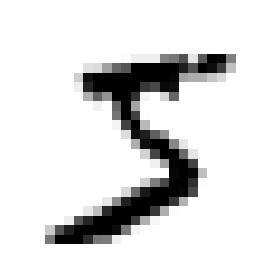

In [297]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [298]:
y[0]

'5'

In [299]:
y = y.astype(np.uint8)

In [300]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [301]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


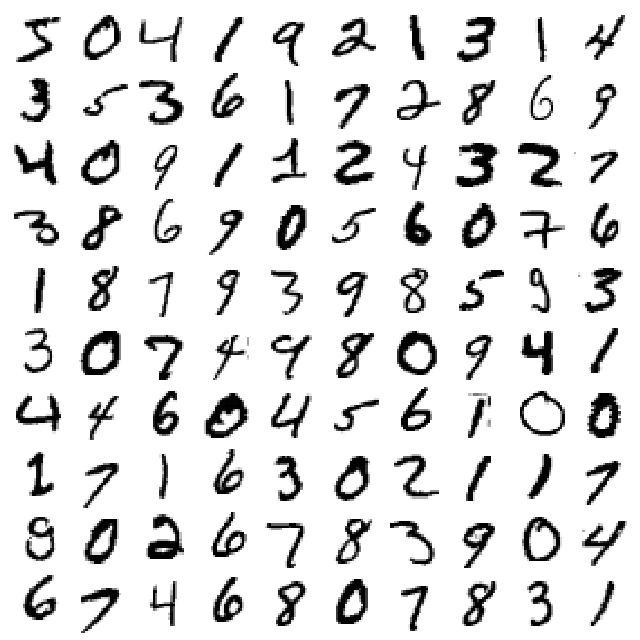

In [302]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [303]:
y[0]

5

In [304]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Build a Sample Binary Classifier

In [313]:
# Using 5 as a test for accuracy (later down)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

#print(y_train_5, y_test_5)

In [314]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [315]:
sgd_clf.predict([some_digit])

array([ True])

In [316]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [310]:
from sklearn.model_selection import StratifiedKFold #used for generating training set data
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

# Please read my article on accuracy at this location: https://www.linkedin.com/pulse/primer-classification-metrics-pat-bhatt

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [21]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [23]:
4096 / (4096 + 1522)

0.7290850836596654

In [24]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [25]:
4096 / (4096 + 1325)

0.7555801512636044

In [26]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [27]:
4096 / (4096 + (1522 + 1325) / 2)

0.7420962043663375

In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [29]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [30]:
y_some_digit_pred

array([ True])

In [31]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


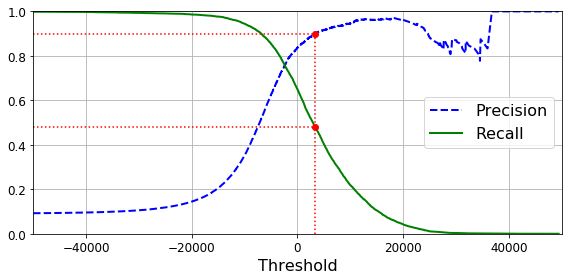

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [35]:
(y_train_pred == (y_scores > 0)).all()

True

Saving figure precision_vs_recall_plot


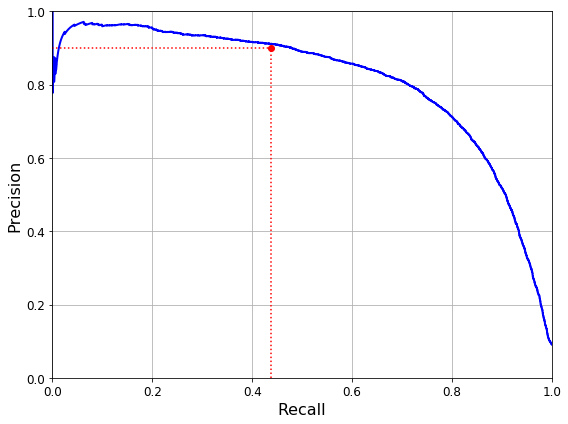

In [36]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [37]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [38]:
threshold_90_precision

3370.0194991439557

In [39]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [40]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [41]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

# Receiver Operating Characteristics (ROC) Curves

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


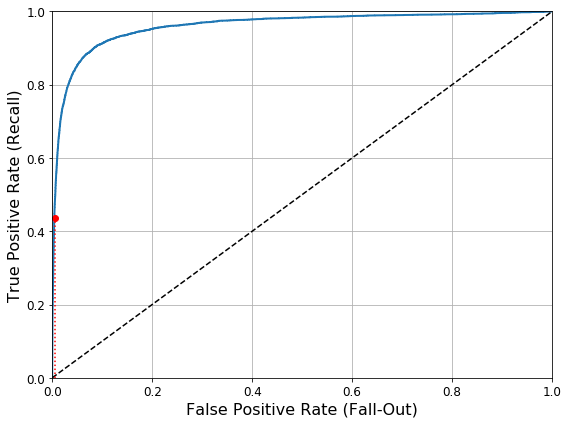

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
save_fig("roc_curve_plot")                         # Not shown
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [45]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [46]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


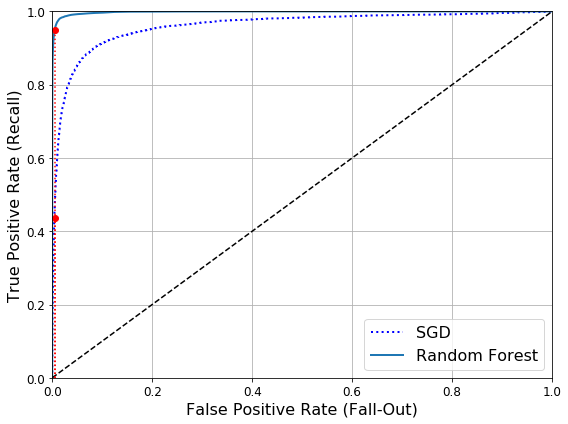

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [48]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [49]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [50]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

# Multiclass Classification

In [51]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [52]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [53]:
np.argmax(some_digit_scores)

5

In [54]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [55]:
svm_clf.classes_[5]

5

In [56]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [57]:
len(ovr_clf.estimators_)

10

In [58]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [59]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [60]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [62]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

In [63]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


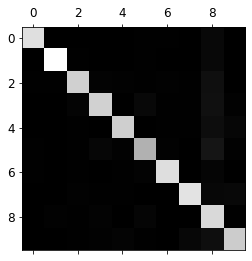

In [64]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [65]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


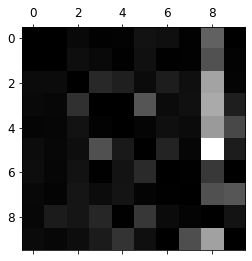

In [66]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_plot


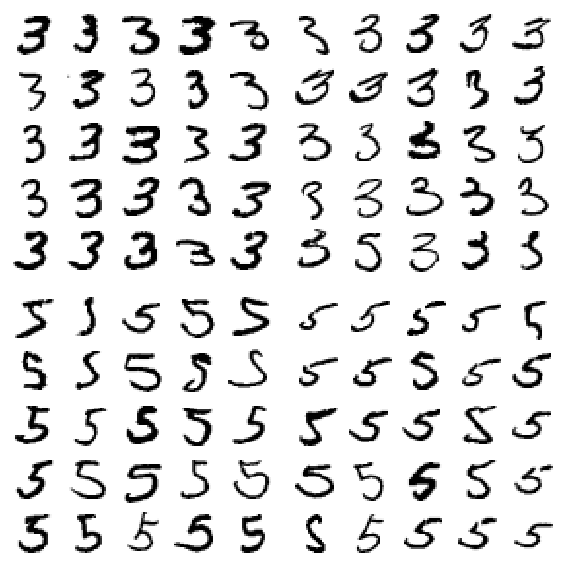

In [67]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel Classification

In [68]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [70]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

# K-Nearest Neighbor Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [72]:
y_knn_pred = knn_clf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

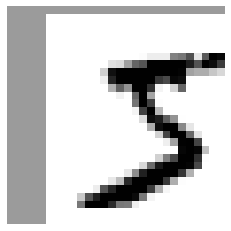

In [74]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [75]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [76]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [77]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [78]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [79]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

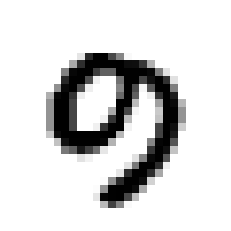

In [80]:
plot_digit(ambiguous_digit)